# The Spark Foundation |  Data Science & Business Analyst Intern

> Submitted by : **SHIVJI**

## Task 1 : Prediction using Supervised learning

### Objective : Predict the percentage of an student based on the number of study hours.

#### 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove warning
import warnings
warnings.filterwarnings("ignore")

#### 2. Reading the data 

In [2]:
df = pd.read_csv("data.txt", sep=",")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


`Insight`

- This dataset contain the **25 rows** and **2 columns**.
- This dataset have **only numerical values**.
- There are **no missing values** present in the dataset.

#### 3. Exploratory Data Analysis

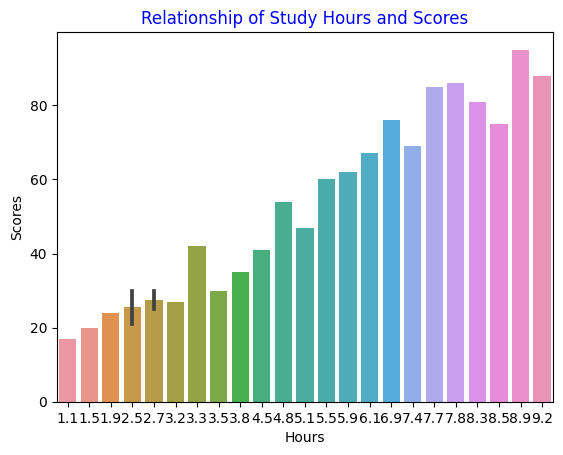

In [7]:
plt.title("Relationship of Study Hours and Scores", c="b")
sns.barplot(x=df.Hours,y=df.Scores)
plt.show()

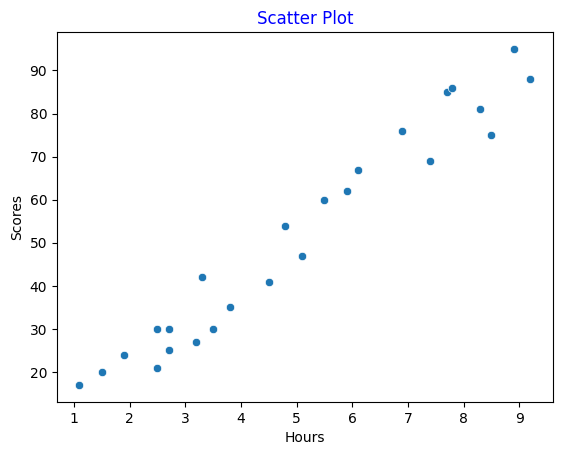

In [8]:
plt.title("Scatter Plot", c="b")
sns.scatterplot(x=df.Hours, y=df.Scores)
plt.show()

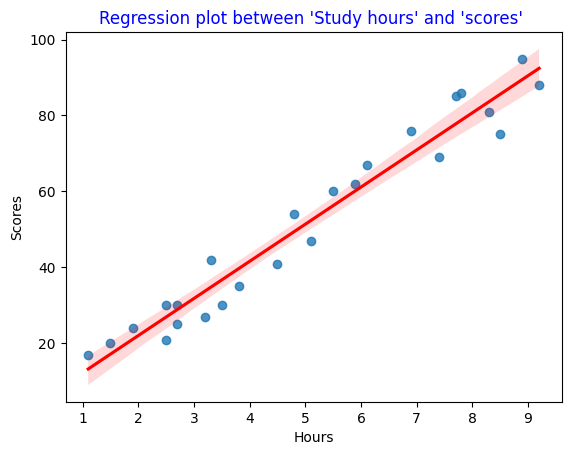

In [9]:
plt.title("Regression plot between 'Study hours' and 'scores' ", color="b")
sns.regplot(x=df.Hours, y=df.Scores,line_kws = {"color": "red"})
plt.show()

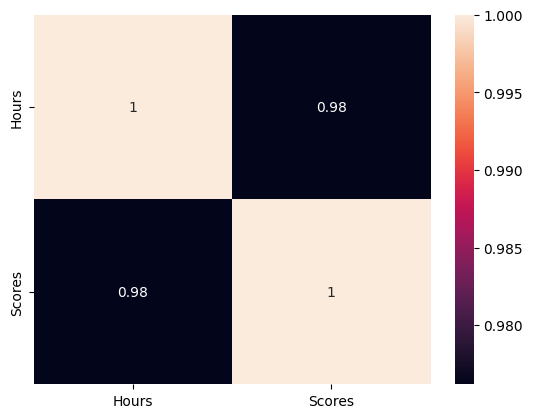

In [10]:
# correlation
sns.heatmap(df.corr(), annot=True)
plt.show()


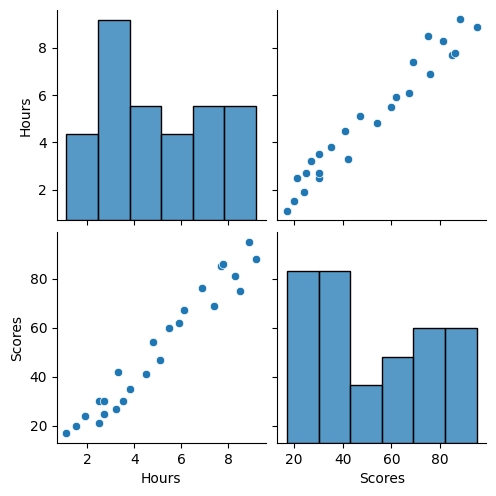

In [11]:
sns.pairplot(df)
plt.show()

`Insight`

- From the barplot, we can see as the **study hours increase** then **percentage of score also increase**.
- From the above plots, It shows the **linear relationship between "Study Hours" and "Score percentage"**. It mean if the study hours increase then score percentage will also increase.

#### 4. Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# splitting the dataset into the dependent and independent set
X = np.array(df.Hours).reshape(-1,1)     # independent set
Y = np.array(df.Scores)                  # dependent set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [16]:
X_test.shape, y_test.shape

((5, 1), (5,))

#### 5. Model Building using LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
# finding coefficent and intercept point
print(f"""Linear Coefficent : {lr.coef_}
Linear Intercept : {lr.intercept_}""")

Linear Coefficent : [9.68207815]
Linear Intercept : 2.826892353899737


##### Prediction using Linear Regression Model

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

##### Evaluating Modeel

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
# using r2_scoer metircs
r2_score(y_test, y_pred)*100

96.78055545167994

In [25]:
# usin MAE
mean_absolute_error(y_test, y_pred)

3.9207511902099244

In [26]:
# using mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

4.352380006653288

#### 6. Save the model

In [27]:
import pickle

In [28]:
pickle.dump(lr, open("lr_model.pkl", "wb"))

In [29]:
#load the model
lr = pickle.load(open("lr_model.pkl", "rb"))

In [30]:
lr

LinearRegression()

#### 7. Test the model

##### Q. What will be a predicted score if student studied for 9.25hrs/day?

In [31]:
# making prediction

hours = 9.25

new_df = pd.DataFrame({"Hours": hours}, index=[0])
pred_score = lr.predict(new_df)

print(f"Prediction Score of {hours} Study Hours : {np.round(pred_score,2)}%")

Prediction Score of 9.25 Study Hours : [92.39]%


### If a student study **9.25hrs/day** then the possiblities of getting score is **92.39%**.